In [ ]:
# Importing necessary packages.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot
from scipy.stats import shapiro,ttest_ind
from statsmodels.stats.diagnostic import het_breuschpagan,linear_rainbow
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Reading an Excel file.
file_name = "Student_data.xlsx"
df = pd.read_excel(file_name)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   StudentID    395 non-null    int64 
 1   school2      395 non-null    object
 2   sex          395 non-null    object
 3   age          395 non-null    int64 
 4   address      395 non-null    object
 5   famsize      395 non-null    object
 6   Pstatus      395 non-null    object
 7   Medu         395 non-null    int64 
 8   Fedu         395 non-null    int64 
 9   Mjob         395 non-null    object
 10  Fjob         395 non-null    object
 11  reason       395 non-null    object
 12  guardian     395 non-null    object
 13  traveltime   395 non-null    int64 
 14  studytime    395 non-null    int64 
 15  failures     395 non-null    int64 
 16  schoolsup    395 non-null    object
 17  famsup       395 non-null    object
 18  paid         395 non-null    object
 19  activities   395 non-null    

**1. Choose all or several variables which you hypothesize to affect the student’s final grade.**

I hypothesized that the following variables may affect the final grade: *school2*, *sex*, *age*, *address*, *famsize*, *Pstatus*, *studytime*, *failures*, *schoolsup*,*famsup*, *paid*, *activities*, *higher*, *internet*, *romantic*, *famrel*, *freetime*, *goout*, *Dalc*, *Walc*, *health*, *absences*.

In [ ]:
data = df[["school2", "sex", "age", "address", "famsize", "Pstatus", "studytime", "failures", "schoolsup", "famsup", "paid", "higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences", "Final_Grade"]]

In [ ]:
data.head()

,school2,sex,age,address,famsize,Pstatus,studytime,failures,schoolsup,famsup,paid,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade
0,GP,F,18,U,GT3,A,2,0,yes,no,no,yes,no,no,4,3,4,1,1,3,6,6
1,GP,F,17,U,GT3,T,2,0,no,yes,no,yes,yes,no,5,3,3,1,1,3,4,6
2,GP,F,15,U,LE3,T,2,3,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,10
3,GP,F,15,U,GT3,T,3,0,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15
4,GP,F,16,U,GT3,T,2,0,no,yes,yes,yes,no,no,4,3,2,1,2,5,4,10


In [ ]:
# Separating data into numeric and object parts.
data_num = data.select_dtypes(exclude=["object"])
data_obj = data.select_dtypes(include="object")

In [ ]:
# Transforming object variables into dummy.
data_dummies = pd.get_dummies(data_obj, drop_first=True)
data_dummies.head()

,school2_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,higher_yes,internet_yes,romantic_yes
0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,1,0,1,0,1,0,1,1,0
2,0,0,1,1,1,1,0,1,1,1,0
3,0,0,1,0,1,0,1,1,1,1,1
4,0,0,1,0,1,0,1,1,1,0,0


In [ ]:
data_model = data_num.join(data_dummies, how='left')
data_model.head()

,age,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,Final_Grade,school2_MS,sex_M,address_U,famsize_LE3,Pstatus_T,schoolsup_yes,famsup_yes,paid_yes,higher_yes,internet_yes,romantic_yes
0,18,2,0,4,3,4,1,1,3,6,6,0,0,1,0,0,1,0,0,1,0,0
1,17,2,0,5,3,3,1,1,3,4,6,0,0,1,0,1,0,1,0,1,1,0
2,15,2,3,4,3,2,2,3,3,10,10,0,0,1,1,1,1,0,1,1,1,0
3,15,3,0,3,2,2,1,1,5,2,15,0,0,1,0,1,0,1,1,1,1,1
4,16,2,0,4,3,2,1,2,5,4,10,0,0,1,0,1,0,1,1,1,0,0


In [ ]:
Y = data_model.Final_Grade
X = data_model.drop('Final_Grade', axis = 1)
X = sm.add_constant(X)

In [ ]:
# Train-test split data.
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
# Running the linear regression.
model_linear = sm.OLS(Y0, X0)
results = model_linear.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3.868
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           9.43e-08
Time:                        13:52:12   Log-Likelihood:                -826.64
No. Observations:                 296   AIC:                             1697.
Df Residuals:                     274   BIC:                             1778.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.1821      4.393      3.000      0.003       4.533      21.831
age              -0.3358      0.227     -1.480      0.140      -0.783       0.111
studytime         0.5697      0.328      1.738      0.083      -0.076       1.215
failures         -1.6025      0.359     -4.459      0.000      -2.310      -0.895
famrel            0.2884      0.288      1.002      0.317      -0.278       0.855
freetime          0.1962      0.261      0.752      0.453      -0.317       0.710
goout            -0.4934      0.259     -1.907      0.058      -1.003       0.016
Dalc             -0.1604      0.352     -0.455      0.649      -0.854       0.533
Walc              0.0907      0.277      0.328      0.743      -0.454       0.636
health           -0.1439      0.176     -0.816      0.415      -0.491       0.203
absences          0.0592      0.031      1.931      0.055      -0.001       0.120
school2_MS        0.7497      0.888      0.844      0.400      -0.999       2.499
sex_M             1.1164      0.570      1.960      0.051      -0.005       2.238
address_U         0.5343      0.631      0.847      0.398      -0.708       1.777
famsize_LE3       0.3198      0.545      0.587      0.558      -0.752       1.392
Pstatus_T        -0.9417      0.826     -1.140      0.255      -2.569       0.685
schoolsup_yes    -0.9715      0.726     -1.337      0.182      -2.401       0.458
famsup_yes       -0.9580      0.539     -1.777      0.077      -2.019       0.103
paid_yes          0.9968      0.540      1.847      0.066      -0.066       2.059
higher_yes        1.9324      1.121      1.723      0.086      -0.275       4.140
internet_yes      0.7618      0.693      1.098      0.273      -0.603       2.127
romantic_yes     -0.7966      0.532     -1.499      0.135      -1.843       0.250
==============================================================================
Omnibus:                       21.765   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.616
Skew:                          -0.644   Prob(JB):                     4.52e-06
Kurtosis:                       3.580   Cond. No.                         368.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Checking the prediction on a test set.
Y1_pred=results.predict(X1)
print('R^2_test:', r2_score(Y1, Y1_pred))

R^2_test: 0.18197233173678606


**3. Evaluate the overall moodel, check internal validity (diagnose to see whether assumptions are met or not).**

**L**inearity | Rainbow Test

In [ ]:
# Our p-value is equal to 0.68, which is bigger than 0.05, meaning that
# we don't have enough evidence to reject the linearity assumption.
# Linearity assumption is held.
rnames=["fstat", "p-value"]
rainbow_res=linear_rainbow(results)
print(list(zip(rnames, rainbow_res)))

[('fstat', 0.9224775487415549), ('p-value', 0.6825676727303185)]


**I**ndependence | Variance Inflation Factor (VIF)

In [ ]:
# Our VIF is eual to 1.297, meaning that there is a moderate correlation
# between independent variables. We can conclude that there is no significant
# multicollinearity problem.
VIF = 1/(1-0.229)
print(VIF)

1.297016861219196


**N**ormality | Shapiro-Wilk Test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


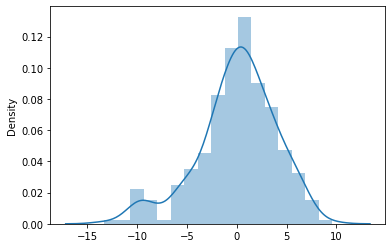

In [ ]:
residuals=results.resid
sns.distplot(residuals)
plt.show()

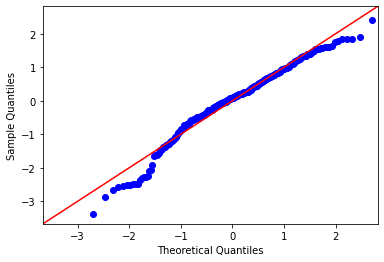

In [ ]:
qqplot(residuals,fit=True, line='45')
plt.show()

In [ ]:
# Our p-value is equal to 0.00000621, which is smaller than 0.05, meaning that
# there is enough evidence to reject the normality assumption.
# Normality assumption is not held.
snames=['The test statistic', 'p-value']
shapiro_res=shapiro(residuals)
print(list(zip(snames, shapiro_res)))

[('The test statistic', 0.9693987369537354), ('p-value', 6.21060735284118e-06)]


**E**quality of Variance (Breusch-Pagan Test)



In [ ]:
residuals=results.resid
residuals.head(10)
pred_values=results.predict()

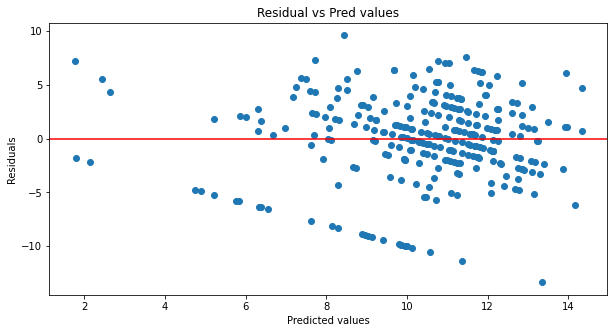

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pred_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residual vs Pred values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

In [ ]:
# Our p-value is equal to 0.085, which is bigger than 0.05, meaning that
# we don't have enough evidence to reject the homoscedasticity assumtion.
# Homoscedasticity assumption is held.
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 30.374408175647027), ('p-value', 0.08471851982668746), ('f-value', 1.492001218522624), ('f p-value', 0.07917245433513513)]


**4. Extend the model (using transformation, selection or shrinkage methods) to obtain a better model, if possible.**

In order to improve the model, I used backward seletion method, by removing the most insignificant variables one by one. Even though while checking whether the distribution of variables is normal or not there were some variables having not normal distribution, transforming them into logarithm made the model worse, therefore, the prticular step was skipped. Previously, **R^2** was equal to **0.229**, whereas **adjusted R^2** was equal to **0.170**. The performance on a test was equal to **0.182**. From comparing the results of test and train (based on adjusted R^2 since it's more robust) we may conclude that there is a significant problem with underfitting, and there are a lot of non-informative variables based on the difference between R^2 and adjusted R^2.

In [ ]:
# Using backward selection removing Walc, Dalc, famrel, school2, address, famsize variables one by one
# and looking at the behavior of the model. The final model consists of the following variables.
data2 = df[[ "sex", "age", "Pstatus", "studytime", "failures", "schoolsup", "famsup", "paid", "higher", "internet", "romantic", "freetime", "goout", "health", "absences", "Final_Grade"]]

In [ ]:
data2_num = data2.select_dtypes(exclude=["object"])
data2_obj = data2.select_dtypes(include="object")

In [ ]:
data2_dummies = pd.get_dummies(data2_obj, drop_first=True)
data2_model = data2_num.join(data2_dummies, how='left')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


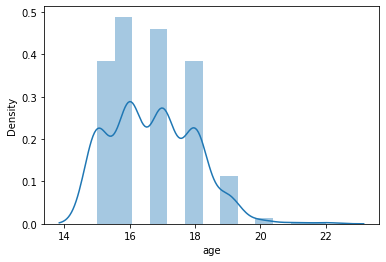

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


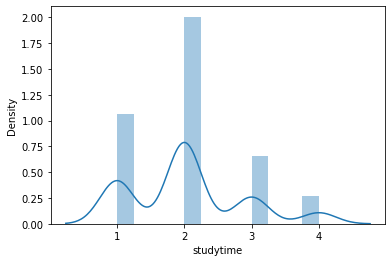

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


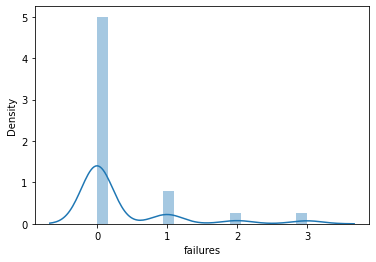

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


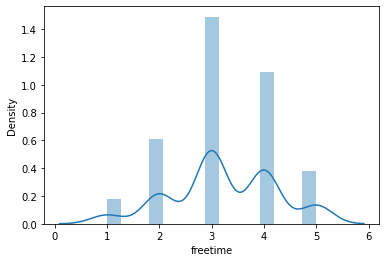

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


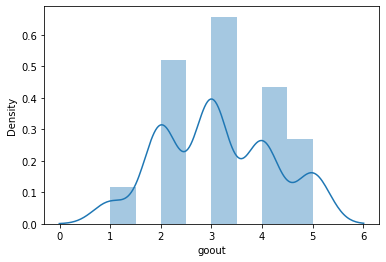

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


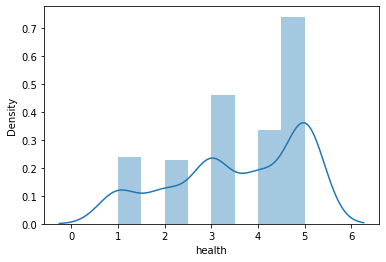

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


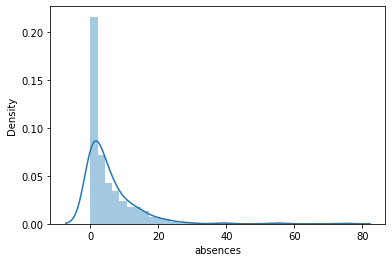

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


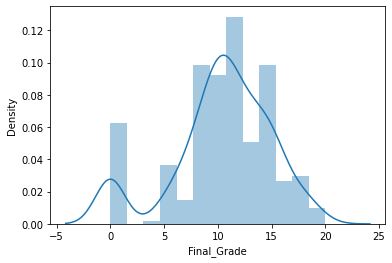

In [ ]:
# Examining the value distribution of numeric features.
for i in data2_num.columns.tolist():
    sns.distplot(data2_num[i])
    plt.xlabel(i)
    plt.show()

In [ ]:
# Creating interaction term from the existing variables in the dataset.
# With the square of age, it is possible to test the quadratic relationship
# between age and final grade. Adding this variable improved the result of R^2,
# however, made the large overfitting. Therefore, it wasn't included in a final model.
#data2_model["age_sq"]=data2_model['age']**2

In [ ]:
Y = data2_model.Final_Grade
X = data2_model.drop('Final_Grade', axis = 1)
X = sm.add_constant(X)

In [ ]:
# Train-test split data.
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
# Running thee 2nd linear model.
model_linear2 = sm.OLS(Y0, X0)
results = model_linear2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     5.295
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.40e-09
Time:                        14:19:54   Log-Likelihood:                -828.11
No. Observations:                 296   AIC:                             1688.
Df Residuals:                     280   BIC:                             1747.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.9256      4.108      3.390      0.001       5.839      22.012
age              -0.2919      0.212     -1.379      0.169      -0.709       0.125
studytime         0.5718      0.314      1.821      0.070      -0.046       1.190
failures         -1.6675      0.354     -4.715      0.000      -2.364      -0.971
freetime          0.2181      0.254      0.857      0.392      -0.283       0.719
goout            -0.4520      0.228     -1.984      0.048      -0.900      -0.003
health           -0.1425      0.174     -0.820      0.413      -0.484       0.199
absences          0.0541      0.029      1.838      0.067      -0.004       0.112
sex_M             1.0937      0.538      2.033      0.043       0.035       2.153
Pstatus_T        -0.8936      0.807     -1.107      0.269      -2.483       0.696
schoolsup_yes    -0.9702      0.717     -1.353      0.177      -2.382       0.442
famsup_yes       -1.0991      0.523     -2.102      0.036      -2.129      -0.070
paid_yes          0.9799      0.523      1.874      0.062      -0.049       2.009
higher_yes        2.0213      1.108      1.824      0.069      -0.161       4.203
internet_yes      0.7995      0.674      1.185      0.237      -0.528       2.127
romantic_yes     -0.7866      0.521     -1.510      0.132      -1.812       0.239
==============================================================================
Omnibus:                       23.372   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.869
Skew:                          -0.669   Prob(JB):                     1.46e-06
Kurtosis:                       3.623   Cond. No.                         335.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Checking the prediction on a test set.
Y1_pred=results.predict(X1)
print('R^2_test:', r2_score(Y1, Y1_pred))

R^2_test: 0.17310854236409012




```
# This is formatted as code
```

**Shrinkage Methods**

In [ ]:
# Ridge (L2 term)
model_linear3 = sm.OLS(Y0,X0)
results_ridge = model_linear3.fit_regularized(L1_wt=0,alpha=0.0001)
# Checking coefficients.
results_ridge.params

array([13.52498182, -0.27345815,  0.57430993, -1.67049643,  0.2213718 ,
       -0.45134778, -0.13834211,  0.05397118,  1.0984663 , -0.88255749,
       -0.95191269, -1.09268388,  0.97704447,  2.05677082,  0.81200857,
       -0.78936181])

In [ ]:
# As it was expected, the preformance of a model wasn't improved, since there was almost
# no overfitting in second model while comparing test and train (adjusted R^2).
Y0_pred = results_ridge.predict(X0)
Y1_pred = results_ridge.predict(X1)
print('R^2_train',r2_score(Y0,Y0_pred))
print('R^2_test',r2_score(Y1,Y1_pred))

R^2_train 0.22096407048457622
R^2_test 0.17269352038694485


In [ ]:
# Lasso (L2 term)
results_lasso = model_linear3.fit_regularized(L1_wt=1,alpha=0.01)
# Checking coeffisients.
results_lasso.params

const            8.843851
age             -0.033871
studytime        0.582876
failures        -1.723390
freetime         0.249579
goout           -0.444678
health          -0.099466
absences         0.050294
sex_M            1.095431
Pstatus_T       -0.757963
schoolsup_yes   -0.655783
famsup_yes      -0.983184
paid_yes         0.908709
higher_yes       2.254056
internet_yes     0.885385
romantic_yes    -0.798931
dtype: float64

In [ ]:
# The preformance of a model became even worse.
Y0_pred_ls = results_lasso.predict(X0)
Y1_pred_ls = results_lasso.predict(X1)
print('R^2_train',r2_score(Y0,Y0_pred_ls))
print('R^2_test',r2_score(Y1,Y1_pred_ls))

R^2_train 0.2162774640255235
R^2_test 0.16544744362815011


In [ ]:
# Extended model using backward selection performed the best, therefore,
# this model will be diagnosed.
Y = data2_model.Final_Grade
X = data2_model.drop('Final_Grade', axis = 1)
X = sm.add_constant(X)
X0, X1, Y0, Y1 = train_test_split(X, Y, test_size=0.25, random_state=42)
model_linear2 = sm.OLS(Y0, X0)
results = model_linear2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Final_Grade   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     5.295
Date:                Tue, 16 Mar 2021   Prob (F-statistic):           2.40e-09
Time:                        14:58:09   Log-Likelihood:                -828.11
No. Observations:                 296   AIC:                             1688.
Df Residuals:                     280   BIC:                             1747.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            13.9256      4.108      3.390      0.001       5.839      22.012
age              -0.2919      0.212     -1.379      0.169      -0.709       0.125
studytime         0.5718      0.314      1.821      0.070      -0.046       1.190
failures         -1.6675      0.354     -4.715      0.000      -2.364      -0.971
freetime          0.2181      0.254      0.857      0.392      -0.283       0.719
goout            -0.4520      0.228     -1.984      0.048      -0.900      -0.003
health           -0.1425      0.174     -0.820      0.413      -0.484       0.199
absences          0.0541      0.029      1.838      0.067      -0.004       0.112
sex_M             1.0937      0.538      2.033      0.043       0.035       2.153
Pstatus_T        -0.8936      0.807     -1.107      0.269      -2.483       0.696
schoolsup_yes    -0.9702      0.717     -1.353      0.177      -2.382       0.442
famsup_yes       -1.0991      0.523     -2.102      0.036      -2.129      -0.070
paid_yes          0.9799      0.523      1.874      0.062      -0.049       2.009
higher_yes        2.0213      1.108      1.824      0.069      -0.161       4.203
internet_yes      0.7995      0.674      1.185      0.237      -0.528       2.127
romantic_yes     -0.7866      0.521     -1.510      0.132      -1.812       0.239
==============================================================================
Omnibus:                       23.372   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.869
Skew:                          -0.669   Prob(JB):                     1.46e-06
Kurtosis:                       3.623   Cond. No.                         335.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
Y1_pred=results.predict(X1)
print('R^2_test:', r2_score(Y1, Y1_pred))

R^2_test: 0.17310854236409012


**L**inearity | Rainbow Test

In [ ]:
# Our p-value is equal to 0.58, which is bigger than 0.05, meaning that
# we don't have enough evidence to reject the linearity assumption.
# Linearity assumption is held.
rnames=["fstat", "p-value"]
rainbow_res=linear_rainbow(results)
print(list(zip(rnames, rainbow_res)))

[('fstat', 0.9671829729304686), ('p-value', 0.5792663148192143)]


**I**ndependence | Variance Inflation Factor (VIF)

In [ ]:
# Our VIF is eual to 1.28, meaning that there is a moderate correlation
# between independent variables. We can conclude that there is no significant
# multicollinearity problem.
VIF = 1/(1-0.221)
print(VIF)

1.2836970474967908


**N**ormality | Shapiro-Wilk Test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


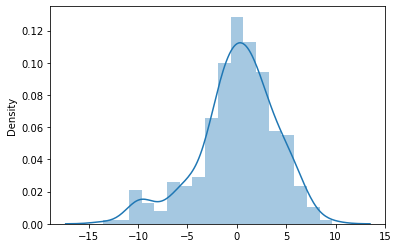

In [ ]:
residuals=results.resid
sns.distplot(residuals)
plt.show()

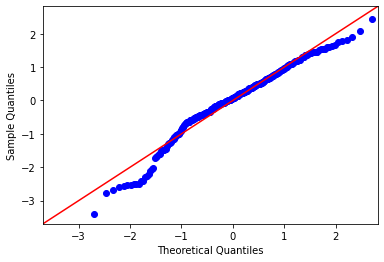

In [ ]:
qqplot(residuals,fit=True, line='45')
plt.show()

In [ ]:
residuals=results.resid
residuals.head(10)
pred_values=results.predict()

In [ ]:
# Our p-value is equal to 0.00000259, which is smaller than 0.05, meaning that
# there is enough evidence to reject the normality assumption.
# Normality assumption is not held.
snames=['The test statistic', 'p-value']
shapiro_res=shapiro(residuals)
print(list(zip(snames, shapiro_res)))

[('The test statistic', 0.9668574333190918), ('p-value', 2.591973952803528e-06)]


**E**quality of Variance (Breusch-Pagan Test)

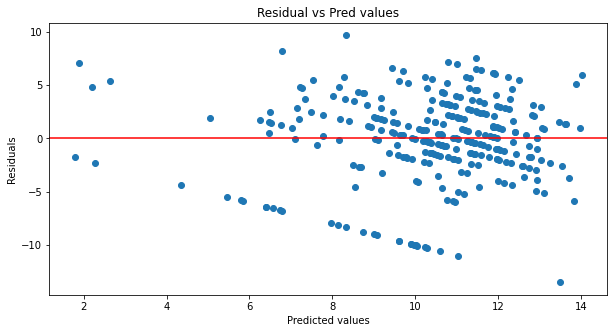

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pred_values,residuals)
plt.axhline(y=0, c="red")
plt.title("Residual vs Pred values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.show()

In [ ]:
# Our p-value is equal to 0.026, which is bigger than 0.05, meaning that
# we have enough evidence to reject the homoscedasticity assumtion.
# Homoscedasticity assumption is not held.
bnames = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
breush = het_breuschpagan(residuals, results.model.exog)
print(list(zip(bnames, breush)))

[('Lagrange multiplier statistic', 27.330057404734823), ('p-value', 0.026159415590318657), ('f-value', 1.8988393961269296), ('f p-value', 0.02320932286432042)]


**5. Select the model which performs better on the test and/or passes diagnostics best.**

As it was mentioned previously, the initial model had a problem of underfitting and precense of non-informative variables. Backward selection helped to fight these problems. With **model_linear2**, the difference between test and train (based on **adjusted R^2** since it's more robust) is only **0.006**, meaning that the problem with under/overfitting was eliminated. I would like to highlight that there are still some variables that are not significant according to their p-values, however, after removing them the model was getting worse, that's why they were keeped. The difference between **R^2** and **adjusted R^2** is equal to **0.042**, which is less in comparison to the initial model **(0.059)**, meaning that now we have more or less more of informative variables.

**6. Interpret the results obtained from the final model.**

- R^2 and F-statistics: As Prob (F-statistic) shows our model is statistically significant at **5% (even 1%)** significance level, so there is at least one estimated coefficient (besides intercept) that is not null. R^2 shows that 22% of variance in final grade is explained by the variables included in the model. This is not the best result, but this is something that could be obtained using the data we had.

- **Adjusted R^2** is not exactly the same as **R^2 (18%)**, which means that there are still some variables that are not that infomrative.

- *failures* (0.000), *goout* (0.048), *sex* (0.043), and *famsup_yes* (0.036) are the most significant variables, since their p-values are less than 0.05.

- For each unit decrease in *failures* we will experience on average about **1.6675** unit increase in final grade, which is logical, since the less failures you have, the better fianal grade can be.

- For each unit decrease in *goout* we will experience on average about **0.4520** unit increase in final grade. It can be explained by the fact that the less we go out with frinds, the more we study and get better final grade.

- The reference category for *sex* is 'female,' meaning that if a student's gender is male rather than female, on average, **1.0937** unit increase is expected in final grade.

- The reference category for *famsup* is 'no,' meaning that if a student has a family support, relatively to the ones who do not, on average, **0.036** unit decrease is expected in final grade.
